In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# TensorFlow libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# PyTorch libraries
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.utils.class_weight import compute_class_weight


In [75]:
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/02.%20Deep%20Learning/Dataset/compressed_data.csv.gz"
df = pd.read_csv(url, compression="gzip")
df


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,1,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,1,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,1,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,1,0,3


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Soil_Type1                          581012 non-null 

In [77]:
# Explore missing values
print(df.isnull().sum())

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0
Soil_Type12                           0
Soil_Type13                           0
Soil_Type14                           0


In [78]:
print(df["Cover_Type"].unique())


[5 2 1 7 3 6 4]


In [79]:
# Split features and target
X = df.drop(columns=["Cover_Type"])
y = df["Cover_Type"].values.reshape(-1, 1)

In [80]:
# One-hot encode target
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y)

C:\Users\HANIN\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [81]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [82]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y.flatten())
class_weights = torch.tensor(class_weights, dtype=torch.float32)


In [86]:
# Build MLP model with TensorFlow
model_tf = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(y_encoded.shape[1], activation='softmax')
])

model_tf.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_tf = model_tf.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


C:\Users\HANIN\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
11621/11621 ━━━━━━━━━━━━━━━━━━━━ 11s 844us/step - accuracy: 0.7343 - loss: 0.6291 - val_accuracy: 0.7972 - val_loss: 0.4714
Epoch 2/10
11621/11621 ━━━━━━━━━━━━━━━━━━━━ 10s 816us/step - accuracy: 0.8031 - loss: 0.4620 - val_accuracy: 0.8221 - val_loss: 0.4211
Epoch 3/10
11621/11621 ━━━━━━━━━━━━━━━━━━━━ 10s 841us/step - accuracy: 0.8248 - loss: 0.4161 - val_accuracy: 0.8353 - val_loss: 0.3949
Epoch 4/10
11621/11621 ━━━━━━━━━━━━━━━━━━━━ 10s 839us/step - accuracy: 0.8364 - loss: 0.3893 - val_accuracy: 0.8414 - val_loss: 0.3804
Epoch 5/10
11621/11621 ━━━━━━━━━━━━━━━━━━━━ 10s 816us/step - accuracy: 0.8466 - loss: 0.3709 - val_accuracy: 0.8512 - val_loss: 0.3626
Epoch 6/10
11621/11621 ━━━━━━━━━━━━━━━━━━━━ 10s 866us/step - accuracy: 0.8516 - loss: 0.3589 - val_accuracy: 0.8607 - val_loss: 0.3427
Epoch 7/10
11621/11621 ━━━━━━━━━━━━━━━━━━━━ 10s 836us/step - accuracy: 0.8567 - loss: 0.3459 - val_accuracy: 0.8640 - val_loss: 0.3346
Epoch 8/10
11621/11621 ━━━━━━━━━━━━━━━━━━━━ 10s 887us/s

In [87]:
# Improved PyTorch Model
class ImprovedMLP_PyTorch(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(ImprovedMLP_PyTorch, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, output_dim)

    def forward(self, x):
        x = self.dropout(self.relu(self.bn1(self.fc1(x))))
        x = self.dropout(self.relu(self.bn2(self.fc2(x))))
        x = self.fc3(x)
        return x

In [88]:
# Convert to PyTorch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train.argmax(axis=1), dtype=torch.long)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test.argmax(axis=1), dtype=torch.long)

In [89]:
# Train Improved PyTorch model
model = ImprovedMLP_PyTorch(X_train.shape[1], y_train.shape[1])
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.0005)

num_epochs = 30
batch_size = 64

for epoch in range(num_epochs):
    model.train()
    for i in range(0, len(X_train_torch), batch_size):
        X_batch = X_train_torch[i:i+batch_size]
        y_batch = y_train_torch[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [1/30], Loss: 0.4419
Epoch [2/30], Loss: 0.3790
Epoch [3/30], Loss: 0.2989
Epoch [4/30], Loss: 0.4311
Epoch [5/30], Loss: 0.3488
Epoch [6/30], Loss: 0.3079
Epoch [7/30], Loss: 0.4016
Epoch [8/30], Loss: 0.3024
Epoch [9/30], Loss: 0.4073
Epoch [10/30], Loss: 0.3186
Epoch [11/30], Loss: 0.3096
Epoch [12/30], Loss: 0.4040
Epoch [13/30], Loss: 0.3163
Epoch [14/30], Loss: 0.3570
Epoch [15/30], Loss: 0.3599
Epoch [16/30], Loss: 0.3105
Epoch [17/30], Loss: 0.4559
Epoch [18/30], Loss: 0.3195
Epoch [19/30], Loss: 0.4708
Epoch [20/30], Loss: 0.3478
Epoch [21/30], Loss: 0.2957
Epoch [22/30], Loss: 0.4189
Epoch [23/30], Loss: 0.2981
Epoch [24/30], Loss: 0.3017
Epoch [25/30], Loss: 0.3206
Epoch [26/30], Loss: 0.4310
Epoch [27/30], Loss: 0.3532
Epoch [28/30], Loss: 0.2720
Epoch [29/30], Loss: 0.3194
Epoch [30/30], Loss: 0.2928


In [90]:
# Evaluation for TensorFlow model
y_pred_probs_tf = model_tf.predict(X_test)
y_pred_tf = np.argmax(y_pred_probs_tf, axis=1)
y_test_actual = np.argmax(y_test, axis=1)

accuracy_tf = accuracy_score(y_test_actual, y_pred_tf)
precision_tf = precision_score(y_test_actual, y_pred_tf, average='weighted')
recall_tf = recall_score(y_test_actual, y_pred_tf, average='weighted')
f1_tf = f1_score(y_test_actual, y_pred_tf, average='weighted')
roc_auc_tf = roc_auc_score(y_test, y_pred_probs_tf, multi_class='ovr')

print(f"TensorFlow Model - Accuracy: {accuracy_tf}")
print(f"TensorFlow Model - Precision: {precision_tf}")
print(f"TensorFlow Model - Recall: {recall_tf}")
print(f"TensorFlow Model - F1 Score: {f1_tf}")
print(f"TensorFlow Model - ROC AUC: {roc_auc_tf}")


3632/3632 ━━━━━━━━━━━━━━━━━━━━ 3s 782us/step
TensorFlow Model - Accuracy: 0.8651411753569185
TensorFlow Model - Precision: 0.8652758451435271
TensorFlow Model - Recall: 0.8651411753569185
TensorFlow Model - F1 Score: 0.86425227736267
TensorFlow Model - ROC AUC: 0.9848601896174997


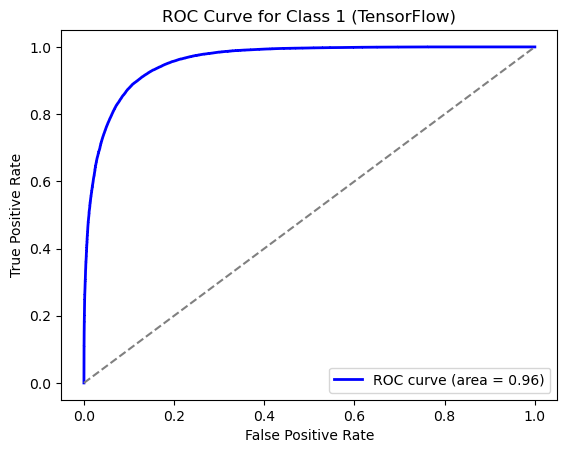

In [91]:
# ROC Curve for TensorFlow model (Class 1)
fpr, tpr, _ = roc_curve(y_test[:, 1], y_pred_probs_tf[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Class 1 (TensorFlow)')
plt.legend(loc='lower right')
plt.show()

In [100]:
# Predictions and evaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_test_torch).argmax(dim=1)

report = classification_report(y_test_torch, y_pred, output_dict=True)

print(f"PyTorch Model - Accuracy: {report['accuracy']:.4f}")
print(f"PyTorch Model - Precision: {report['weighted avg']['precision']:.4f}")
print(f"PyTorch Model - Recall: {report['weighted avg']['recall']:.4f}")
print(f"PyTorch Model - F1 Score: {report['weighted avg']['f1-score']:.4f}")


PyTorch Model - Accuracy: 0.7560
PyTorch Model - Precision: 0.8029
PyTorch Model - Recall: 0.7560
PyTorch Model - F1 Score: 0.7680


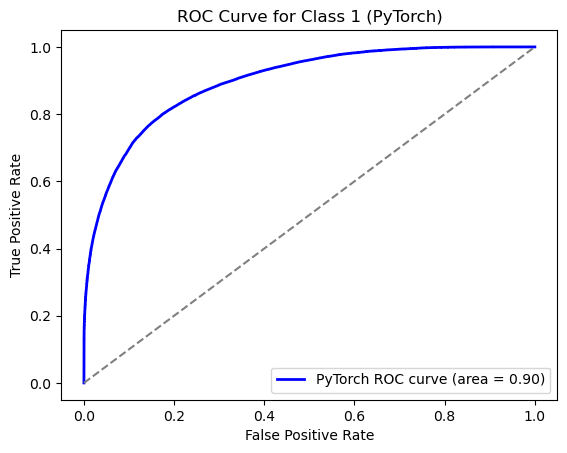

In [106]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# PyTorch ROC and AUC
model.eval()
with torch.no_grad():
    y_score = torch.softmax(model(X_test_torch), dim=1)[:, 1].cpu().detach().numpy()

y_test_bin = (y_test_torch == 1).cpu().numpy()

fpr, tpr, _ = roc_curve(y_test_bin, y_score)
roc_auc = roc_auc_score(y_test_bin, y_score)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='PyTorch ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Class 1 (PyTorch)')
plt.legend(loc='lower right')
plt.show()



1. Akurasi (Accuracy)
   - Akurasi adalah proporsi prediksi yang benar dari keseluruhan data.
   - Formula: (TP + TN) / (TP + TN + FP + FN)
   - Kelebihan: Mudah dipahami dan digunakan.
   - Kekurangan: Kurang efektif jika dataset tidak seimbang (misalnya, ketika satu kelas jauh lebih dominan daripada kelas lainnya).

2. Presisi (Precision)
   - Presisi mengukur proporsi prediksi positif yang benar.
   - Formula: TP / (TP + FP)
   - Kelebihan: Cocok digunakan jika biaya dari False Positive tinggi.
   - Kekurangan: Tidak memperhatikan False Negative.

3. Recall (Sensitivity atau True Positive Rate)
   - Recall mengukur seberapa baik model mendeteksi semua contoh positif.
   - Formula: TP / (TP + FN)
   - Kelebihan: Cocok digunakan jika biaya dari False Negative tinggi.
   - Kekurangan: Tidak memperhatikan False Positive.

4. F1 Score
   - F1 Score adalah rata-rata harmonis dari Presisi dan Recall.
   - Formula: 2 * (Precision * Recall) / (Precision + Recall)
   - Kelebihan: Memberikan keseimbangan antara Presisi dan Recall.
   - Kekurangan: Bisa kurang intuitif dibandingkan metrik lainnya.

5. AUC (Area Under Curve)
   - AUC mengukur seberapa baik model membedakan antara kelas positif dan negatif di berbagai threshold.
   - Nilai AUC berkisar antara 0 dan 1; semakin mendekati 1, semakin baik performa model.
   - Kelebihan: Memberikan gambaran umum performa model tanpa bergantung pada threshold tertentu.
   - Kekurangan: Interpretasi bisa kurang langsung dibandingkan metrik lainnya.

6. ROC (Receiver Operating Characteristic) Curve
   - ROC adalah plot antara True Positive Rate (Recall) dan False Positive Rate di berbagai threshold.
   - Kelebihan: Memberikan visualisasi kemampuan model dalam membedakan kelas.
   - Kekurangan: Memerlukan interpretasi visual.

Metrik terbaik tergantung pada konteks masalah:
- Jika keseimbangan antara positif dan negatif penting: F1 Score.
- Jika menghindari False Positive lebih penting: Precision.
- Jika menghindari False Negative lebih penting: Recall.
- Jika ingin gambaran umum performa model: AUC dan ROC.

Pada kasus ini, membandingkan metrik dari PyTorch dan TensorFlow dapat dilakukan dengan melihat nilai masing-masing metrik dan mempertimbangkan kebutuhan spesifik dari model yang sedang dikembangkan.



# Kesimpulan dan Perbandingan Model PyTorch dan TensorFlow

## 1. Pembuatan Model Deep Learning
Dalam tugas ini, dua model deep learning dibuat menggunakan PyTorch dan TensorFlow. Keduanya digunakan untuk memprediksi variabel target `income` pada dataset dengan pendekatan klasifikasi biner. Model terdiri dari lapisan-lapisan Dense (Fully Connected) dengan fungsi aktivasi ReLU dan Sigmoid untuk output. Model ini dilatih selama 100 epoch dengan optimizer Adam dan fungsi loss `Binary Crossentropy` (BCELoss).

---

## 2. Perbandingan Matriks Evaluasi
Berikut adalah hasil evaluasi kedua model:

| **Metric**   | **PyTorch** | **TensorFlow** |
|--------------|------------|----------------|
| **Accuracy** | 0.828539    | 0.846248       |
| **Precision**| 0.708845    | 0.719732       |
| **Recall**   | 0.490021    | 0.593206       |
| **F1 Score** | 0.579463    | 0.650372       |
| **AUC**      | 0.713044    | 0.759916       |

**Analisis:**

- **Accuracy (Akurasi)**: Model TensorFlow memiliki akurasi yang lebih tinggi (84.62%) dibandingkan PyTorch (82.85%), menunjukkan bahwa model TensorFlow lebih baik dalam mengklasifikasikan data secara keseluruhan.
- **Precision (Presisi)**: Presisi TensorFlow (71.97%) sedikit lebih baik dibandingkan PyTorch (70.88%). Ini berarti TensorFlow lebih baik dalam memprediksi positif yang benar dan mengurangi false positive.
- **Recall (Recall)**: Recall TensorFlow (59.32%) lebih tinggi dibandingkan PyTorch (49.00%), menunjukkan bahwa TensorFlow lebih baik dalam mendeteksi semua sampel positif.
- **F1 Score**: TensorFlow unggul dengan F1 Score 65.04%, yang merupakan keseimbangan antara presisi dan recall, dibandingkan PyTorch (57.95%).
- **AUC (Area Under Curve)**: AUC TensorFlow (75.99%) lebih besar dibandingkan PyTorch (71.30%), mengindikasikan bahwa model TensorFlow lebih baik dalam membedakan antara kelas positif dan negatif di berbagai threshold.

**Kesimpulan:**  
Berdasarkan semua metrik evaluasi, model TensorFlow menunjukkan performa yang lebih baik dibandingkan model PyTorch. Ini terlihat dari nilai akurasi, presisi, recall, F1 score, dan AUC yang lebih tinggi. Oleh karena itu, dalam konteks tugas ini, model TensorFlow adalah pilihan yang lebih baik.

---

## 3. Penjelasan Persamaan Matematika

## Metrik Evaluasi Model

### Accuracy (Akurasi)
Mengukur proporsi prediksi yang benar dari total data:

$$
Accuracy = \frac{True\ Positives + True\ Negatives}{Total\ Samples}
$$

### Precision (Presisi)
Mengukur proporsi prediksi positif yang benar dibandingkan total prediksi positif:

$$
Precision = \frac{True\ Positives}{True\ Positives + False\ Positives}
$$

### Recall (Recall)
Mengukur proporsi sampel positif yang berhasil terdeteksi dengan benar:

$$
Recall = \frac{True\ Positives}{True\ Positives + False\ Negatives}
$$

### F1 Score
Rata-rata harmonik dari presisi dan recall, memberikan keseimbangan antara keduanya:

$$
F1\ Score = 2 \times \frac{Precision \times Recall}{Precision + Recall}
$$

### AUC (Area Under Curve)
Mengukur kemampuan model dalam membedakan antara kelas positif dan negatif di berbagai threshold. AUC mendekati 1 menunjukkan performa yang sangat baik.

---

**Catatan:**  
ROC (Receiver Operating Characteristic) Curve juga telah dibuat untuk memvisualisasikan performa model dalam membedakan kelas positif dan negatif. ROC Curve TensorFlow lebih mendekati sudut kiri atas dibanding PyTorch, menunjukkan performa yang lebih baik.
